# Finding of Over- and Underpriced Houses

## Prepare Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
houses = pd.read_csv("kc_house_data_categories.csv")

#print head of data
houses.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,renovated,Category
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650,0,2
1,538000.0,3,2.0,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639,1,1
2,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062,0,2
3,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000,0,4
4,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503,0,5


## Boxplot to illustrate outliers

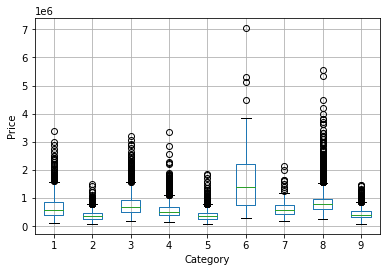

In [3]:
# Boxplot to find over and underpriced houses
houses.boxplot(column=['price'], by=['Category'])
plt.ylabel('Price')
plt.xlabel('Category')
plt.title('')
plt.suptitle('')
plt.savefig('../Paper/Boxplot.png')
plt.show()

## Find upper whiskers for each category

In [4]:
# subset of houses with certain category
cat=houses.loc[houses["Category"]==1,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper1=quartiles[1]+1.5*IQR

######################################################

# subset of houses with certain category
cat=houses.loc[houses["Category"]==2,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper2=quartiles[1]+1.5*IQR

######################################################

# subset of houses with certain category
cat=houses.loc[houses["Category"]==3,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper3=quartiles[1]+1.5*IQR

######################################################

# subset of houses with certain category
cat=houses.loc[houses["Category"]==4,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper4=quartiles[1]+1.5*IQR

######################################################

# subset of houses with certain category
cat=houses.loc[houses["Category"]==5,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper5=quartiles[1]+1.5*IQR

######################################################

# subset of houses with certain category
cat=houses.loc[houses["Category"]==6,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper6=quartiles[1]+1.5*IQR

######################################################

# subset of houses with certain category
cat=houses.loc[houses["Category"]==7,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper7=quartiles[1]+1.5*IQR

######################################################

# subset of houses with certain category
cat=houses.loc[houses["Category"]==8,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper8=quartiles[1]+1.5*IQR

######################################################

# subset of houses with certain category
cat=houses.loc[houses["Category"]==9,]

# find 1st and 3rd quartile
quartiles=list(cat.price.quantile([0.25,0.75]))

#Interquartile Range
IQR=quartiles[1]-quartiles[0]

#Upper whiskeir
upper9=quartiles[1]+1.5*IQR

######################################################

#All upper whiskers
print(upper1)
print(upper2)
print(upper3)
print(upper4)
print(upper5)
print(upper6)
print(upper7)
print(upper8)
print(upper9)

1582812.5
795000.0
1578125.0
1114625.0
777500.0
4367500.0
1215075.0
1550000.0
856875.0


### Add an indicator for overpriced houses to the data

In [5]:
#function to add new column to data frame based on conditions
def overpriced(df):

    if (df['Category']==1 and df['price']>upper1):
        return 1
    elif (df['Category']==2 and df['price']>upper2):
        return 1
    elif (df['Category']==3 and df['price']>upper3):
        return 1
    elif (df['Category']==4 and df['price']>upper4):
        return 1
    elif (df['Category']==5 and df['price']>upper5):
        return 1
    elif (df['Category']==6 and df['price']>upper6):
        return 1
    elif (df['Category']==7 and df['price']>upper7):
        return 1
    elif (df['Category']==8 and df['price']>upper8):
        return 1
    elif (df['Category']==9 and df['price']>upper9):
        return 1
    else :
        return 0
    
#apply function
houses['overpriced'] = houses.apply(overpriced, axis = 1)


### Summary statistics

In [50]:
#Total houses who are overprived
print(houses['overpriced'].value_counts())

#Dataframe with per category statistics

#categories
categories=list(range(1,10))

#total number of houses per category
housesPerCategory=list(houses.groupby("Category")["Category"].count())

#overpriced houses per category
overpricedPerCategory=list(houses.loc[houses['overpriced']==1,].groupby(["Category"])["overpriced"].count())

#share of overpriced houses
overpricedShare=["{:.2%}".format(int(b) / int(m)) for b,m in zip(overpricedPerCategory, housesPerCategory)]

#data frame
overpricedHouses=pd.DataFrame(data=zip(housesPerCategory,overpricedPerCategory,overpricedShare),
                             columns=['Houses', 'Overpriced Houses', 'Share'],
                             index=categories)
display(overpricedHouses)
with open('overpricedHouses.tex','w') as tf:
    tf.write(overpricedHouses.to_latex())

0    20775
1      812
Name: overpriced, dtype: int64


,Houses,Overpriced Houses,Share
1,844,47,5.57%
2,4739,79,1.67%
3,1339,68,5.08%
4,3254,140,4.30%
5,3346,136,4.06%
6,162,4,2.47%
7,229,9,3.93%
8,2843,238,8.37%
9,4831,91,1.88%
